In [1]:
import pandas as pd
from core.convert_data import class2numeric, norm
from core.math import mu
import numpy as np
from sklearn.model_selection import train_test_split
from models.near_neigbor import NearNeighbor
from models.bayes import NaiveBayes
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from models.LinearClassifier import LinearClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/mushrooms.csv")
data = class2numeric(data)

In [3]:
data['bias'] = 1

In [4]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,bias
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,1,1,2,1
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,0,0,1,3,1,0,1,10,...,6,7,0,2,0,0,8,5,6,1
8120,1,0,0,0,1,3,1,0,1,10,...,6,7,0,1,0,0,8,3,6,1
8121,1,3,0,0,1,3,1,0,1,1,...,6,7,0,2,0,0,8,5,6,1
8122,0,4,1,0,1,6,0,0,0,8,...,0,0,0,0,0,1,4,3,6,1


In [5]:
Y = data['class']
X = data.drop(['class'], axis=1)
X = norm(X)

In [6]:
Y = np.array(Y)
X = np.array(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [8]:
model = LinearClassifier(X_train, y_train)

In [9]:
margin = model.margin_(X_train, y_train)
margin = np.sort(np.array(margin))

In [10]:
margin

array([-5.06661605, -5.02345434, -4.98681004, ...,  2.96266951,
        3.04902527,  3.12883127])

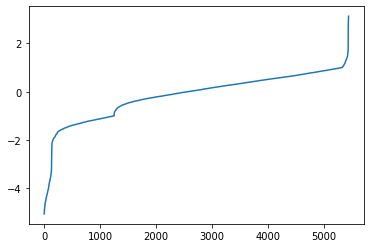

In [11]:
plt.plot(np.sort(margin))

In [12]:
error_func = lambda x: x ** 2 if x < 0 else 0

In [13]:
y = np.array(list(map(model.error_func, margin)))

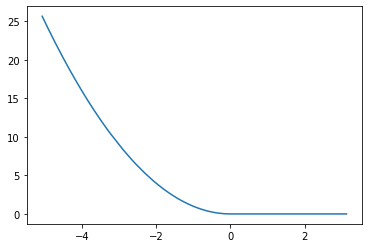

In [14]:
plt.plot(margin, y)

In [21]:
model.stochastic_gradient(X_train, y_train)

0.0


In [ ]:
np.random.choice(y)

In [ ]:
def derivative(self, x, y, h=1e-4):
    f1 = self.error_func(self.margin((x + h, y)))
    f2 = self.error_func(self.margin((x - h, y)))
    return (f1 - f2) / (2 * h)

In [ ]:
    f1 = self.error_func(self.margin((x + h, y)))
    f2 = self.error_func(self.margin((x - h, y)))

In [23]:
x = X_train[0]
x

array([ 0.85740042,  1.32562227,  1.09265041, -1.18584358, -0.37835354,
       -0.16288643, -0.43883663,  0.66899713, -1.22647026,  0.87345687,
       -0.21732423, -0.7270601 , -0.74607042,  0.54384233,  0.56924462,
        0.        , -0.14894945, -0.28414032, -0.88471465, -1.26326122,
        0.9500155 ,  0.12693133,  1.        ])

In [25]:
y = y_train[0]
y

1

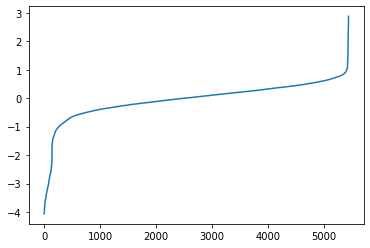

In [77]:
pred = model.pred_(X_train)
pred = np.sort(pred)
plt.plot(np.sort(pred))

In [116]:
h = 1e-5
x = X_train[1]
y = 0
df = np.ones(X_train.shape[1])
for i in range(X_train.shape[1]):
    x1 = x.copy()
    x2 = x.copy()
    x1[i] = x[i] + h
    x2[i] = x[i] - h

    df[i] = (model.pred(x1) - model.pred(x2)) / (2 * h)
df

array([-0.1268093 ,  0.21358711,  0.2144609 , -0.15421656,  0.22600522,
       -0.20056534,  0.01131547,  0.16607486,  0.1094414 ,  0.12459463,
       -0.06248189,  0.01810753, -0.01692364, -0.10290483,  0.15636526,
        0.02103298, -0.18928921,  0.09697909,  0.14216406, -0.03759871,
       -0.15374194,  0.06422968, -0.0504084 ])

In [117]:
h = 1e-5
x = model.pred(X_train[1])
y = 0

dm = (model.margin((x + h, y)) - model.margin((x - h, y))) / (2 * h)
dm

-0.46941839343134917

In [118]:
h = 1e-5
x = model.margin((X_train[1], 0))

dl = (model.error_func(x + h) - model.error_func(x - h)) / (2 * h)
dl

-0.09726037647438383

In [119]:
dl = dl * dm * df
dl

array([-0.00578958,  0.00975149,  0.00979139, -0.00704088,  0.01031845,
       -0.00915697,  0.00051662,  0.00758228,  0.00499664,  0.00568847,
       -0.00285266,  0.00082671, -0.00077266, -0.0046982 ,  0.00713898,
        0.00096028, -0.00864215,  0.00442766,  0.00649062, -0.0017166 ,
       -0.00701921,  0.00293246, -0.00230144])

In [84]:
(x1 - x2) / (2 * h)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1.])

In [81]:
x2

array([-1.03061576,  1.32562227,  0.51951689,  0.84317774,  0.90558305,
       -0.16288643,  2.27847187, -1.49459073, -0.47730903, -1.14473529,
       -0.21732423, -0.7270601 , -0.74607042, -0.73530506, -0.64390945,
        0.        , -0.14894945, -0.28414032, -0.88471465, -1.26326122,
        0.22600744,  0.12693133,  0.99999   ])

In [78]:
model.pred(X_train[1])

0.04863018823717678

In [76]:
dm.shape

(23,)

In [72]:
y_train

array([1, 0, 1, ..., 1, 0, 1])

In [36]:
X_train.shape

(5443, 23)

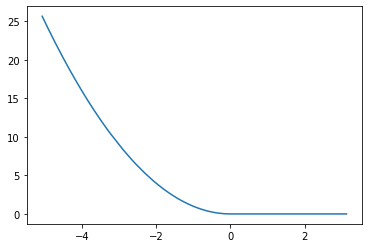

In [35]:
y = np.array(list(map(model.error_func, margin)))
plt.plot(np.sort(margin), y)

In [37]:
X_train.shape

(5443, 23)

In [47]:
x

array([ 0.85740042,  1.32562227,  1.09265041, -1.18584358, -0.37835354,
       -0.16288643, -0.43883663,  0.66899713, -1.22647026,  0.87345687,
       -0.21732423, -0.7270601 , -0.74607042,  0.54384233,  0.56924462,
        0.        , -0.14894945, -0.28414032, -0.88471465, -1.26326122,
        0.9500155 ,  0.12693133,  1.        ])

In [66]:
x_new = X_train[0].copy()

In [67]:
x_new

array([ 0.85740042,  1.32562227,  1.09265041, -1.18584358, -0.37835354,
       -0.16288643, -0.43883663,  0.66899713, -1.22647026,  0.87345687,
       -0.21732423, -0.7270601 , -0.74607042,  0.54384233,  0.56924462,
        0.        , -0.14894945, -0.28414032, -0.88471465, -1.26326122,
        0.9500155 ,  0.12693133,  1.        ])

In [68]:
x_new[0] = x_new[0] + 1e-3

In [69]:
x_new

array([ 0.85840042,  1.32562227,  1.09265041, -1.18584358, -0.37835354,
       -0.16288643, -0.43883663,  0.66899713, -1.22647026,  0.87345687,
       -0.21732423, -0.7270601 , -0.74607042,  0.54384233,  0.56924462,
        0.        , -0.14894945, -0.28414032, -0.88471465, -1.26326122,
        0.9500155 ,  0.12693133,  1.        ])

In [60]:
model.weight * x

array([-0.10872635,  0.28313583,  0.23433079,  0.18287672, -0.08550988,
        0.03266937, -0.00496564,  0.1111036 , -0.13422662,  0.10882803,
        0.01357883, -0.01316526,  0.01262623, -0.055964  ,  0.08901009,
        0.        ,  0.02819452, -0.02755567, -0.12577463,  0.047497  ,
       -0.14605722,  0.00815276, -0.0504084 ])

In [61]:
(model.weight * x).sum()

0.39965010300729564

In [64]:
x[0] + 1e-3

0.8584004208874169

In [63]:
model.weight * (x[0] + 1e-3)

array([-0.10885316,  0.18334327,  0.18409333, -0.13237956,  0.19400298,
       -0.17216537,  0.00971321,  0.14255873,  0.09394454,  0.10695208,
       -0.05363448,  0.01554351, -0.01452726, -0.08833355,  0.13422401,
        0.01805472, -0.16248594,  0.08324689,  0.12203369, -0.03227475,
       -0.13197214,  0.05513479, -0.04327059])

In [55]:
model.pred(x[0] + 1e-2)

0.4071737120341758

In [42]:
dm = np.round(dm, 3)
dm

array([-4.69e-01, -4.69e-01, -4.69e-01,  4.69e-01,  4.69e-01,  4.69e-01,
        4.69e-01, -4.69e-01,  4.69e-01, -4.69e-01,  4.69e-01,  4.69e-01,
        4.69e-01, -4.69e-01, -4.69e-01,  1.00e+03,  4.69e-01,  4.69e-01,
        4.69e-01,  4.69e-01, -4.69e-01, -4.69e-01, -4.69e-01])

array([-4.69e-01, -4.69e-01, -4.69e-01,  4.69e-01,  4.69e-01,  4.69e-01,
        4.69e-01, -4.69e-01,  4.69e-01, -4.69e-01,  4.69e-01,  4.69e-01,
        4.69e-01, -4.69e-01, -4.69e-01,  1.00e+03,  4.69e-01,  4.69e-01,
        4.69e-01,  4.69e-01, -4.69e-01, -4.69e-01, -4.69e-01],
      dtype=float32)

In [ ]:
import random

In [ ]:
random.choice(range(1000))

In [ ]:
def derivative(x, f, h=1e-3):
    """
    Search derivative f function in x with h scope
    """
    return (f(x + h) - f(x - h)) / (2 * h)

In [ ]:
derivative(X_train[20], model.pred)

In [ ]:
model.pred(X_train)

In [ ]:
(model.weight * X_train).sum(axis=1).shape

In [ ]:
(X_train[0] * model.weight).sum()

In [ ]:
y_train[0]

In [ ]:
margin  = []

In [ ]:
margin  = []
for x, y in zip(X_train, y_train):
    margin.append(model.margin((x, y)))

In [ ]:
margin = np.sort(np.array(margin))
margin

In [ ]:
plt.plot(np.unique(np.round(margin, 3)))

In [ ]:
a = lambda x: x ** 2 if x < 0 else 0

In [ ]:
x = margin
y = np.array(list(map(a, margin)))
plt.grid()
plt.plot(x, y)

In [ ]:
y

In [ ]:
y

In [ ]:
y.sum() / len(y)

In [ ]:
x = X_train[:2]
x

In [ ]:
((model.weight * x) >= 0).astype(int)